In [2]:
import numpy as np
import math
import sys
import statistics
import csv
import matplotlib.pyplot as plt

Ground Truth

In [3]:
gt = {}
benchmarks = ["pi", "GPA", "tug_of_war", "altermu2", "normal_mixture", "spacex", "zeroone", "weekend", "conjugate_gaussians"]

gt["pi"] = (5 - math.pi)/4
gt["GPA"] = 0.6115107913669064
gt["tug_of_war"] = 0.5
gt["altermu2"] = 0.1550617483
gt["normal_mixture"] = {"theta": 12/42, "mu1": -9.702359975571609, "mu2": 9.657948191704119}
gt["spacex"] = 30.00463476991299
gt["zeroone"] = {"w1": 0.0565823032448, "w2": 3.68882559517}
gt["weekend"] = 0.3742061754266954
gt["conjugate_gaussians"] = 1.0
gt["conjugate_gaussians2"] = 17/3
gt["coinBias"] = 5/12
gt["addFun_sum"] = 0.0
gt["clickGraph"] = 0.614154185582757
gt["addFun_max"] = 1/math.sqrt(math.pi)
gt["clinicalTrial2"] = 2/7
gt["clinicalTrial1"] = 1 - 78460907384924307566949191554862076141244676160/94572409612368043294199619316675018741649913883
gt["trueskill"] = 0.5
gt["laplace_scaling"] = 0.5
gt["hmm"] = 0.5
gt["or"] = 0.5



Functions

In [4]:
def stan_accuracy(benchmark_name, var_name, gt, file_name="results.txt"):
    # file_name = "/space/poorvagarg/cmdstan-2.28.2/benchmarks/" + benchmark_name + "/" + file_name
    file_handle = open(file_name, "r")
    lines = file_handle.readlines()

    answer = 0
    for i in lines:
        current = i.split()
        # print(current)
        if current != []:
            if current[0] == var_name:
                answer = float(current[1])
    handle2 = open("stan_results.txt", "a")
    handle2.writelines(benchmark_name + "," + var_name + "," + str(abs(gt - answer)) + "\n")
    handle2.close()
    return abs(gt - answer)

def AQUA_accuracy(benchmark_name, result_file, gt):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()

    min_error = 10000000    
    for i in lines:
        cur = float(i[:-1])
        if abs(gt - cur) < min_error:
            min_error = abs(gt - cur)
    return min_error

def Alea_accuracy(benchmark_name, result_file, gt, position, flag):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()
    
    min_error = 100000000
    min_line = ""
    for i in lines:
        # print(i)
        # print(position)
        bits = float(i.split(",")[0])
        pieces = (math.log2(float((i.split(",")[1]))))
        if pieces < bits/2.0:
            continue
        btime = float(i.split(",")[-1])
        if btime > 1200:
            continue
        cur = float(i.split(",")[position])
        # if float(i.split(",")[1]) <= 8.0:
            # continue
        if (flag == None):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line=i
        elif (float(i.split(",")[flag[1]]) == flag[0]):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line = i
        else:
            continue
    print(min_line)
    return min_error

def WebPPL_accuracy(benchmark, method, gt, upperlimit, suffix="", flag = True, lower_limit=2):
    min_error = 1000000000
    a = 0
    # for number in range(16, 17):
    for number in range(lower_limit,upperlimit+1):
        print(number)
    # for number in range(24, 25):
        ans = []
        
        
        
        if not flag:
            file_handle = open("/space/poorvagarg/webppl_benchmarks/" + benchmark + "/results_7200/output" + suffix + "_" + method + "_" + str(number) + ".txt", "r")
        else:
            print(benchmark, suffix, method, number)
            file_handle = open("/space/poorvagarg/webppl_benchmarks/" + benchmark + "/output" + suffix + "_" + method + "_" + str(number) + ".txt", "r")
        
        lines = file_handle.readlines()
        # lines = lines[0:10]
        for i in lines:
            # print(i)
            
            if i.split() == []:
                continue
            if i.split()[0] == "{":
                # print(float(i.split()[2][:-1]))

                if int(i.split()[-2]) > 1200000:
                    continue
                ans.append(abs(float(i.split()[2][:-1]) - gt))
            else:
                continue
        if ans == []:
            # print(number)
            continue
        
        cur = statistics.mean(ans)
        # print(statistics.mean(ans), statistics.stdev(ans))
        # print(cur, gt)
        if (cur < min_error):
            a = number
            print("yo")
            print(number)
            min_error = cur
    # print(number)
    return min_error

def write_csv(data):
    with open("/space/poorvagarg/.julia/dev/Alea/benchmarks/results.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(data)

def stan_iterations(filename):
    f = open(filename, "r")
    a = f.readlines()[1]
    iter = a[a.find("(") + 1:a.find(")")]
    print(iter)
    return int(iter)









Pi

In [6]:
aqua_res = "Not supported"
dice_res = Alea_accuracy("pi", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/pi/results2.txt", gt["pi"], 1, None)
webppl_rej_res = WebPPL_accuracy("pi", "rejection", gt["pi"], 40)
webppl_mcmc_res = WebPPL_accuracy("pi", "MCMC", gt["pi"], 40)
webppl_smc_res = WebPPL_accuracy("pi", "SMC", gt["pi"], 40)
# psi_res = "remaining integrals"
stan_res = stan_accuracy("pi", "answer", 1 - gt["pi"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/pi/results_1200.txt")

# stan_res

# write_csv(["pi", aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, psi_res])
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res


8.0,0.46287536621093756,223.626791841

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


('Not supported',
 0.0017264703916141655,
 9.122033927102535e-05,
 9.741326186318844e-05,
 0.0012900914210840497,
 4.836339744829221e-05)

GPA

In [13]:
aqua_res = AQUA_accuracy("GPA", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/GPA/results.txt", gt["GPA"])
dice_res = Alea_accuracy("GPA", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/GPA/results.txt", gt["GPA"], 2, None)
webppl_rej_res = WebPPL_accuracy("GPA", "rejection", gt["GPA"], 19)
webppl_mcmc_res = WebPPL_accuracy("GPA", "MCMC", gt["GPA"], 22)
webppl_smc_res = WebPPL_accuracy("GPA", "SMC", gt["GPA"], 40, flag=True)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res
# aqua_res, dice_res

20.0,1024.0,0.6115107913669062,153.40911844

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.3615107913668967,
 2.220446049250313e-16,
 0.01702872077338129,
 0.00928972642198742,
 0.013794120953237421)

Tug of War

In [12]:
aqua_res = "Not supported"
dice_res = Alea_accuracy("tug_of_war", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/tug_of_war/results.txt", gt["tug_of_war"], 2, None)
webppl_rej_res = WebPPL_accuracy("tug_of_war", "rejection", gt["tug_of_war"], 27)
webppl_mcmc_res = WebPPL_accuracy("tug_of_war", "MCMC", gt["tug_of_war"], 33)
webppl_smc_res = WebPPL_accuracy("tug_of_war", "SMC", gt["tug_of_war"], 40)

stan_res = stan_accuracy("tug_of_war", "ans", gt["tug_of_war"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/tug_of_war/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

10.0,32.0,0.49994258591591584,31.63369172

2
yo
2
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
20
21
22
23
24
25
26
27
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
7
8
yo
8
9
yo
9
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
yo
24
25
26
27
28
29
30
31
32
33
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
15
yo
15
16
yo
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


('Not supported',
 5.741408408416193e-05,
 0.000653839111328125,
 0.0006935060024261475,
 0.00239105224609375,
 4.5069999999980404e-05)

Altermu2

In [25]:
aqua_res = AQUA_accuracy("altermu2", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/altermu2/results.txt", gt["altermu2"])
dice_res = Alea_accuracy("altermu2", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/altermu2/results.txt", gt["altermu2"], 2, None)
webppl_rej_res = WebPPL_accuracy("altermu2", "rejection", gt["altermu2"], 40)
webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 40)
webppl_smc_res = WebPPL_accuracy("altermu2", "SMC", gt["altermu2"], 40)
stan_res = stan_accuracy("altermu2",  "mu[1]", gt["altermu2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/altermu2/results_1200.txt")

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res
# dice_res, webppl_rej_res, webppl_mcmc_res

3.0,32.0,0.1550750016337119,25.575465161

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
5
6
7
yo
7
8
yo
8
9
yo
9
10
11
12
13
14
yo
14
15
16
17
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
4
5
6
7
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


(3.411889291371484e-07,
 1.3253333711910065e-05,
 0.001684008299999984,
 1000000000,
 0.4144364187555497,
 0.44800833729368594)

Normal Mixture

In [24]:
aqua_res = {}
aqua_res["theta"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results_1200.txt", gt["normal_mixture"]["theta"])
aqua_res["mu1"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results1_1200.txt", gt["normal_mixture"]["mu1"])
aqua_res["mu2"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results2_1200.txt", gt["normal_mixture"]["mu2"])

dice_res = {}
dice_res["theta"] = Alea_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["theta"], 2, (1, 3))
dice_res["mu1"] = Alea_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu1"], 2, (2, 3))
dice_res["mu2"] = Alea_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu2"], 2, (0, 3))

webppl_rej_res = {}
webppl_rej_res["theta"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["theta"], 9)
# webppl_rej_res["mu1"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu1"], 1, "2")
# webppl_rej_res["mu2"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu2"], 1, "3")

webppl_mcmc_res = {}
webppl_mcmc_res["theta"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["theta"], 32)
webppl_mcmc_res["mu1"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu1"], 26, "2")
webppl_mcmc_res["mu2"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu2"], 24, "3")

webppl_smc_res = {}
webppl_smc_res["theta"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["theta"], 40)
webppl_smc_res["mu1"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["mu1"], 40, "2")
webppl_smc_res["mu2"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["mu2"], 40, "3")

stan_res = {}
stan_res["theta"] = stan_accuracy("normal_mixture", "theta", gt["normal_mixture"]["theta"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
stan_res["mu1"] = stan_accuracy("normal_mixture", "mu[1]", gt["normal_mixture"]["mu1"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
stan_res["mu2"] = stan_accuracy("normal_mixture", "mu[2]", gt["normal_mixture"]["mu2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
# webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
# # webppl_rej_res, webppl_mcmc_res, aqua_res, 
# dice_res, stan_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

3.0,1.0,0.2856593701886235,1.0,370.616781866

3.0,16.0,-9.697157710855773,2.0,408.978756263

3.0,32.0,9.661872543658466,0.0,434.298843638

2
3
4
5
6
7
8
9
2
yo
2
3
4
5
6
7
yo
7
8
9
yo
9
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
2
yo
2
3
4
5
6
7
yo
7
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
25
26
2
yo
2
3
4
5
6
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
2
yo
2
3
yo
3
4
5
yo
5
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
14
yo
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
9
yo
9
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8


({'theta': 4.130437008531551e-07,
  'mu1': 7.55332333923775e-06,
  'mu2': 8.65302144426039e-06},
 {'theta': 5.4915525662224685e-05,
  'mu1': 0.005202264715835625,
  'mu2': 0.003924351954347927},
 {'theta': 0.4285801342857143,
  'mu1': 18.69363047557161,
  'mu2': 17.69369559170412},
 {'theta': 1000000000},
 {'theta': 0.0003779279259760571,
  'mu1': 0.001360104620724023,
  'mu2': 0.0007108377231679341},
 {'theta': 0.005092481175763897,
  'mu1': 0.02002021631502373,
  'mu2': 0.011493329844978816})

Spacex

In [10]:
aqua_res = "Not supported"
dice_res = Alea_accuracy("spacex", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex", "rejection", gt["spacex"], 40)
webppl_mcmc_res = WebPPL_accuracy("spacex", "MCMC", gt["spacex"], 40)
webppl_smc_res = WebPPL_accuracy("spacex", "SMC", gt["spacex"], 40)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

stan_res = stan_accuracy("spacex", "cr", gt["spacex"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/spacex/results_1200.txt")
stan_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res


11.0,32.0,30.003941091592345,634.508111663

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.00011523008701175286,
 0.0006936783206441532,
 0.00011523008701175286,
 0.0008841362652106,
 0.002976714907003597,
 0.018999745163382542)

Spacex2

In [15]:
gt["spacex2"] = 38.627999128175354
aqua_res = "Not supported"
dice_res = Alea_accuracy(0.013794120953237421"spacex", "/space/poorvagarg/.julia/dev/Alea/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex2", "rejection", gt["spacex2"], 21)
webppl_mcmc_res = WebPPL_accuracy("spacex2", "MCMC", gt["spacex2"], 20)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

21
20


('Not supported',
 0.0006936783206441532,
 0.0049240346183481165,
 0.025069748023470596)

Weekend

In [9]:
aqua_res = "Not supported"
dice_res = Alea_accuracy("weekend", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/weekend/results.txt", gt["weekend"], 2, None)
webppl_rej_res = WebPPL_accuracy("weekend", "rejection", gt["weekend"], 27)
webppl_mcmc_res = WebPPL_accuracy("weekend", "MCMC", gt["weekend"], 37)
webppl_smc_res = WebPPL_accuracy("weekend", "SMC", gt["weekend"], 40)
psi_res = abs(0.374206175427 - gt["weekend"])

stan_res = abs(gt["weekend"] - 0.389945)

webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

20.0,4096.0,0.3742061962639949,45.869394504

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
37
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.015051637073304624, 0.010412671164660926, 0.0109622080961437)

Zeroone

In [22]:
aqua_res = {}
aqua_res["w1"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results_1200.txt", gt["zeroone"]["w1"])
aqua_res["w2"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results2_1200.txt", gt["zeroone"]["w2"])

dice_res = {}
dice_res["w1"] = Alea_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/zeroone/results.txt", gt["zeroone"]["w1"], 1, (1, 2))
dice_res["w2"] = Alea_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/zeroone/results.txt", gt["zeroone"]["w2"], 1, (2, 2))

webppl_rej_res = {}
# webppl_rej_res["w1"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w1"], 23)
webppl_rej_res["w2"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w2"], 24, "2")

webppl_mcmc_res = {}
# webppl_mcmc_res["w1"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w1"], 28)
webppl_mcmc_res["w2"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w2"], 24, "2")

webppl_smc_res = {}
webppl_smc_res["w1"] = WebPPL_accuracy("zeroone", "SMC", gt["zeroone"]["w1"], 22)
webppl_smc_res["w2"] = WebPPL_accuracy("zeroone", "SMC", gt["zeroone"]["w2"], 20, "2")

stan_res = {}
stan_res["w1"] = stan_accuracy("zeroone", "w1", gt["zeroone"]["w1"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/zeroone/results_1200.txt")
stan_res["w2"] = stan_accuracy("zeroone", "w2", gt["zeroone"]["w2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/zeroone/results_1200.txt")
# # webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
# webppl_rej_res, webppl_mcmc_res, aqua_res, dice_res, stan_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

8.0,0.05648825544443542,1.0,90.516536048

11.0,3.6883744493986876,2.0,111.766408192

2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
yo
2
3
yo
3
4
5
6
yo
6
7
8
yo
8
9
yo
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2
yo
2
3
4
yo
4
5
yo
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


({'w1': 0.0565823032448, 'w2': 3.68882559517},
 {'w1': 9.404780036458005e-05, 'w2': 0.00045114577131233347},
 {'w1': 0.17281851324480002, 'w2': 0.23793210483000005},
 {'w2': 1.3973409887523216},
 {'w2': 1.4274254602355954},
 {'w1': 1000000000, 'w2': 1.0333615296570342})

Conjugate Gaussians

In [27]:
aqua_res = AQUA_accuracy("conjugate_gaussians", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/conjugate_gaussians/results_1200.txt", gt["conjugate_gaussians"])
dice_res = Alea_accuracy("conjugate_gaussians", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/conjugate_gaussians/results.txt", gt["conjugate_gaussians"], 2, None)
webppl_rej_res = WebPPL_accuracy("conjugate_gaussians", "rejection", gt["conjugate_gaussians"], 30)
webppl_mcmc_res = WebPPL_accuracy("conjugate_gaussians", "MCMC", gt["conjugate_gaussians"], 40)
webppl_smc_res = WebPPL_accuracy("conjugate_gaussians", "SMC", gt["conjugate_gaussians"], 40)

stan_res = stan_accuracy("conjugate_gaussians", "mu", gt["conjugate_gaussians"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/conjugate_gaussians/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

17.0,8.0,1.0000012301372767,1185.883949617

2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
24
25
26
27
28
29
30
2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
yo
4
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


(0.9999999999999633,
 1.2301372767087315e-06,
 1.77099999999486e-05,
 0.00017718382607673222,
 0.00032351330845821203,
 0.002953871289601806)

In [39]:
aqua_res = AQUA_accuracy("conjugate_gaussians", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/conjugate_gaussians/results_1200.txt", gt["conjugate_gaussians"])
dice_res = Alea_accuracy("conjugate_gaussians2", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/conjugate_gaussians/results.txt", gt["conjugate_gaussians"], 2, None)
webppl_rej_res = WebPPL_accuracy("conjugate_gaussians2", "rejection", gt["conjugate_gaussians2"], 6)
webppl_mcmc_res = WebPPL_accuracy("conjugate_gaussians2", "MCMC", gt["conjugate_gaussians2"], 38)
webppl_smc_res = WebPPL_accuracy("conjugate_gaussians2", "SMC", gt["conjugate_gaussians2"], 40)

# stan_res = stan_accuracy("conjugate_gaussians2", "mu", gt["conjugate_gaussians2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/conjugate_gaussians2/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, webppl_rej_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

16.0,2048.0,1.0000025431315056,616.730090267

2
conjugate_gaussians2  rejection 2
3
conjugate_gaussians2  rejection 3
4
conjugate_gaussians2  rejection 4
5
conjugate_gaussians2  rejection 5
6
conjugate_gaussians2  rejection 6
2
conjugate_gaussians2  MCMC 2
yo
2
3
conjugate_gaussians2  MCMC 3
yo
3
4
conjugate_gaussians2  MCMC 4
yo
4
5
conjugate_gaussians2  MCMC 5
yo
5
6
conjugate_gaussians2  MCMC 6
yo
6
7
conjugate_gaussians2  MCMC 7
yo
7
8
conjugate_gaussians2  MCMC 8
yo
8
9
conjugate_gaussians2  MCMC 9
yo
9
10
conjugate_gaussians2  MCMC 10
yo
10
11
conjugate_gaussians2  MCMC 11
yo
11
12
conjugate_gaussians2  MCMC 12
yo
12
13
conjugate_gaussians2  MCMC 13
yo
13
14
conjugate_gaussians2  MCMC 14
yo
14
15
conjugate_gaussians2  MCMC 15
yo
15
16
conjugate_gaussians2  MCMC 16
yo
16
17
conjugate_gaussians2  MCMC 17
yo
17
18
conjugate_gaussians2  MCMC 18
yo
18
19
conjugate_gaussians2  MCMC 19
yo
19
20
conjugate_gaussians2  MCMC 20
yo
20
21
conjugate_gaussians2  MCMC 21
yo
21
22
conjugate_gauss

(0.9999999999999633,
 2.5431315056057002e-06,
 1000000000,
 1000000000,
 0.5497986223533383,
 1.5207765737129375)

Coin Bias

In [25]:
aqua_res = AQUA_accuracy("coinBias", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/coinBias/results_1200.txt", gt["coinBias"])
dice_res = Alea_accuracy("coinBias", "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/coinBias/results.txt", gt["coinBias"], 2, None)
stan_res = stan_accuracy("coinBias", "b", gt["coinBias"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/coinBias/results_1200.txt")
webppl_rej_res = WebPPL_accuracy("coinBias", "rejection", gt["coinBias"], 23)
webppl_mcmc_res = WebPPL_accuracy("coinBias", "MCMC", gt["coinBias"], 25)
webppl_smc_res = WebPPL_accuracy("coinBias", "SMC", gt["coinBias"], 21)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

20.0,512.0,0.41666646464564716,319.758297215

2
yo
2
3
yo
3
4
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
yo
3
4
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
yo
24
25
2
yo
2
3
4
yo
4
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
19
20
21


(0.024196077823838313,
 2.0202101952415674e-07,
 1.1756666666695725e-05,
 9.879501849108241e-06,
 7.731382700521539e-05,
 0.0011600496010979676)

addFun_sum

In [40]:
benchmark = "addFun_sum"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 23)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 23)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 23)
stan_res = stan_accuracy("addFun_sum", "ans", gt["addFun_sum"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/addFun_sum/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, stan_res
aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

18.0,2.0,-3.8145027607858474e-6,873.257779599

2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
yo
18
19
20
yo
20
21
yo
21
22
yo
22
23
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
19
20
21
22
23


('not supported',
 3.8145027607858474e-06,
 8.4537301e-05,
 0.0004500229078140143,
 0.0016320280040451368,
 0.0051082356835149105)

clickGraph

In [20]:
benchmark = "clickGraph"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
stan_res = stan_accuracy("clickGraph", "similarityAll", gt["clickGraph"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clickGraph/results_1200.txt")
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 20)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 20)
# webppl_rej_res = "timeout"
# webppl_mcmc_res = "trace not initialized"
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res


8.0,0.6124004865370632,1091.324200244

2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
20
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
yo
24
25
26
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
18
19
20


('not supported',
 0.0017536990456937795,
 0.0007136814228887345,
 0.0012156426716100621,
 0.00307042034704611,
 2.8044417243022757e-05)

addFun_max

In [55]:
benchmark = "addFun_max"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 23)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 24)
stan_res = stan_accuracy("addFun_max", "ans", gt["addFun_max"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/addFun_max/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

17.0,128.0,0.5641873837576667,536.882487331

2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
23
24
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
11
yo
11
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24


('not supported',
 2.1997900895298628e-06,
 0.00034863758596014315,
 0.00044219411886601276,
 0.002902336339822442,
 0.00011933354775628402)

clinicalTrial2

In [16]:
benchmark = "clinicalTrial2"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 22)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 25)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 20)

stan_res = stan_accuracy("clinicalTrial2", "probIfControl", gt["clinicalTrial2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clinicalTrial2/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

10.0,0.28571496691055076,550.84060239

2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2
yo
2
3
yo
3
4
yo
4
5
6
7
8
yo
8
9
yo
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


('not supported',
 6.811962650621339e-07,
 0.11358979050462617,
 0.13181095731215642,
 0.06391710944635005,
 4.5354285714283016e-05)

clinicalTrial1

In [18]:
benchmark = "clinicalTrial1"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
stan_res = stan_accuracy("clinicalTrial1", "isEffective", gt["clinicalTrial1"] + 1, "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clinicalTrial1/results_1200.txt")
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 19)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

6,0.17036154935124595,438.44236884

2
3
yo
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2
3
4
5
6
7
8
9
yo
9
10
11
12
13
14
15
16
yo
16
17
18
19
20
yo
20
21
yo
21
22
23
24
25
26
2
yo
2
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


('not supported',
 5.273559366969494e-16,
 0.04536154935124648,
 0.14072516629460585,
 0.12348654935124648,
 0.004533449351246555)

Trueskill

In [5]:
benchmark = "trueskill"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 21)
stan_res = stan_accuracy("trueskill", "final", gt["trueskill"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/trueskill/results_1200.txt")

aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

4.0,4.0,0.49815954311182076,192.821344239

2
trueskill  rejection 2
yo
2
3
trueskill  rejection 3
4
trueskill  rejection 4
yo
4
5
trueskill  rejection 5
yo
5
6
trueskill  rejection 6
yo
6
7
trueskill  rejection 7
8
trueskill  rejection 8
yo
8
9
trueskill  rejection 9
yo
9
10
trueskill  rejection 10
yo
10
11
trueskill  rejection 11
yo
11
12
trueskill  rejection 12
yo
12
13
trueskill  rejection 13
14
trueskill  rejection 14
yo
14
15
trueskill  rejection 15
yo
15
16
trueskill  rejection 16
yo
16
17
trueskill  rejection 17
yo
17
18
trueskill  rejection 18
yo
18
19
trueskill  rejection 19
yo
19
20
trueskill  rejection 20
yo
20
21
trueskill  rejection 21
yo
21
22
trueskill  rejection 22
yo
22
23
trueskill  rejection 23
24
trueskill  rejection 24
2
trueskill  MCMC 2
yo
2
3
trueskill  MCMC 3
yo
3
4
trueskill  MCMC 4
5
trueskill  MCMC 5
yo
5
6
trueskill  MCMC 6
yo
6
7
trueskill  MCMC 7
yo
7
8
trueskill  MCMC 8
yo
8
9
trueskill  MCMC 9
yo
9
10
trueskill  MCMC 10
yo
10
11
trueskill  MCMC 11
yo
11

('not supported',
 0.0018404568881792427,
 0.00020096302032470703,
 0.0004216134548187256,
 0.0013458251953125,
 6.883000000001971e-05)

Laplace Scaling

In [7]:
benchmark = "laplace_scaling"
files = ["results_1.txt", "results_5.txt", "results_25.txt", "results_125.txt", "results_625.txt", "results_3125.txt", "results_15625.txt", "results_78125.txt"]

abs_error = []
for i in files:
    stan_res = stan_accuracy(benchmark, "prior", gt["laplace_scaling"], "/space/poorvagarg/benchmarks_stan/laplace/" + i)
    abs_error.append(stan_res)

abs_error

abs_error_dice = []
files = ["results_1000.0.txt", "results_500.0.txt", "results_250.0.txt", "results_125.0.txt", "results_62.5.txt", "results_31.25.txt", "results_15.625.txt", "results_7.8125.txt"]
for i in files:
    dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/" + i, gt[benchmark], 2, None)
    abs_error_dice.append(dice_res)

abs_error_dice
# abs_error
# dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + "/results_1000.0.txt", gt[benchmark], 2, None)

# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
# aqua_res = "not supported"
# dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
# webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
# webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

7.0,1024.0,0.5027089146090287,293.303412437

6.0,8.0,0.500475351251982,128.200435083

7.0,16.0,0.5025414336158782,303.188067529

7.0,16.0,0.5031857872599872,282.646248849

8.0,16.0,0.5018358459665251,606.774118389

8.0,16.0,0.5019224618514304,307.43372963

9.0,4096.0,0.5009727644174244,679.552602543

9.0,4096.0,0.5009755976557031,347.851488201



[0.0027089146090286675,
 0.00047535125198194805,
 0.002541433615878219,
 0.003185787259987194,
 0.0018358459665250848,
 0.0019224618514304126,
 0.0009727644174244432,
 0.0009755976557030976]

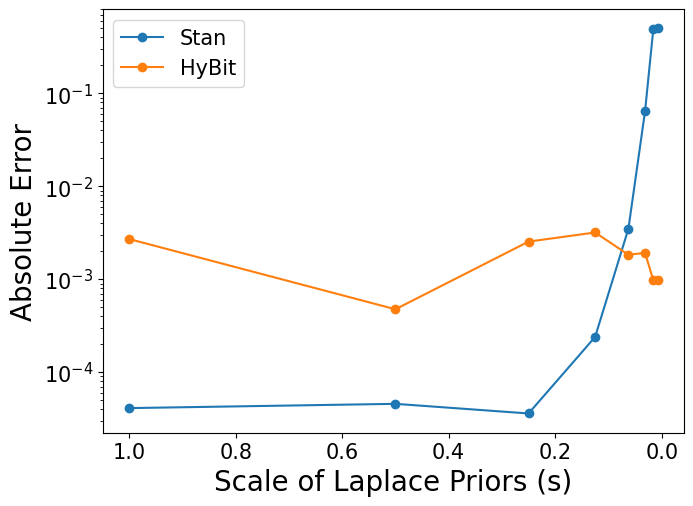

In [11]:
import matplotlib.pyplot as plt

# filehandle = open("/space/poorvagarg/.julia/dev/Alea/scratch/clt_results.txt", "r")
# lines = filehandle.readlines()

x = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]
y = abs_error
y2 = abs_error_dice
# annot = []
# for i in range(0,11):
#     # i = 1
#     cur = lines[i].split(",")
#     # x.append(float(cur[3]))
#     # y.append(float(cur[2]))
#     annot.append(int(float(cur[0])))

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots()
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Scale of Laplace Priors (s)")
ax.set_ylabel("Absolute Error")
ax.plot(x, y, marker = "o")
ax.plot(x, y2, marker = "o")
ax.invert_xaxis()
# for i in range(11):
#      ax.annotate(annot[i], (x[i], y[i]))

# filehandle = open("/space/poorvagarg/.julia/dev/Alea/scratch/lpa_results.txt", "r")
# lines = filehandle.readlines()

# x = []
# y = []
# annot = []
# for i in range(0,10):
#     # i = 1
#     cur = lines[i].split(",")
#     x.append(float(cur[2]))
#     y.append(float(cur[1]))
# #     annot.append(int(float(cur[0])))

# # fig, ax = plt.subplots()
# # ax.set_xscale("log")
# # ax.set_yscale("log")
# ax.plot(x, y, marker = "o")
# for i in range(10):
#      ax.annotate(annot[i], (x[i], y[i]))
ax.legend(["Stan", "HyBit"])
fig.savefig("laplace.png", bbox_inches="tight")

HMM

In [6]:
benchmark = "hmm"
files = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# files = ["results_10.txt", "results_5.txt", "results_25.txt", "results_125.txt", "results_625.txt", "results_3125.txt", "results_15625.txt", "results_78125.txt"]

slicstan_time = [13, 63, 278, 802, 1809, 3429, 6120, 11010, 17189, 26560]
iterations = []

abs_error = []
for i in files:
    stan_res = stan_accuracy("", "theta1", gt["hmm"], f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    abs_error.append(stan_res)
    stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    iterations.append(stan_iter)

abs_error

abs_error_dice = []
# files = ["results_1000.0.txt", "results_500.0.txt", "results_250.0.txt", "results_125.0.txt", "results_62.5.txt", "results_31.25.txt", "results_15.625.txt", "results_7.8125.txt"]
for i in files:
    dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/" + benchmark + f"/results_{i}.txt", gt[benchmark], 2, None)
    abs_error_dice.append(dice_res)

abs_error_dice
iterations
# abs_error

20.0,8192.0,0.49999952316284085,644.264364024

20.0,4096.0,0.49999952316284085,750.81488013

20.0,4096.0,0.49999952316284085,878.153956142

20.0,4096.0,0.49999952316284085,888.043005909

20.0,4096.0,0.49999952316284085,898.366308416

20.0,4096.0,0.49999952316284085,1108.460272711

20.0,2048.0,0.49999952316284085,1127.572445115

20.0,1024.0,0.49999952316284085,1146.228552747

20.0,512.0,0.49999952316284085,1137.454751725

20.0,128.0,0.49999952316284085,1151.042291563



[9347155,
 5351134,
 4650733,
 4439753,
 3944833,
 3206363,
 3006528,
 2549115,
 2244999,
 2068424]

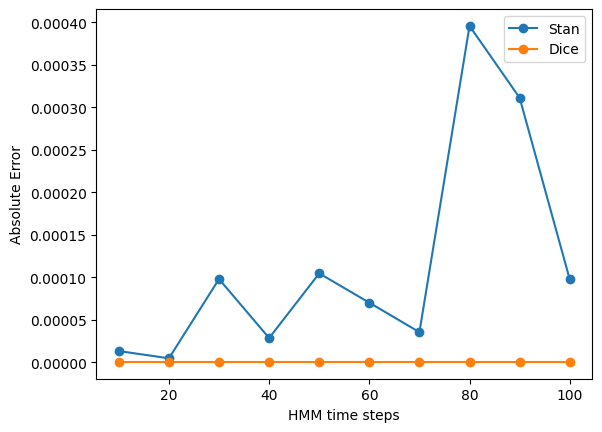

In [7]:
import matplotlib.pyplot as plt

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = abs_error
y2 = abs_error_dice

fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("Absolute Error")
ax.plot(x, y, marker = "o")
ax.plot(x, y2, marker = "o")

ax.legend(["Stan", "Alea"])
fig.savefig("hmm_error.png", bbox_inches="tight")

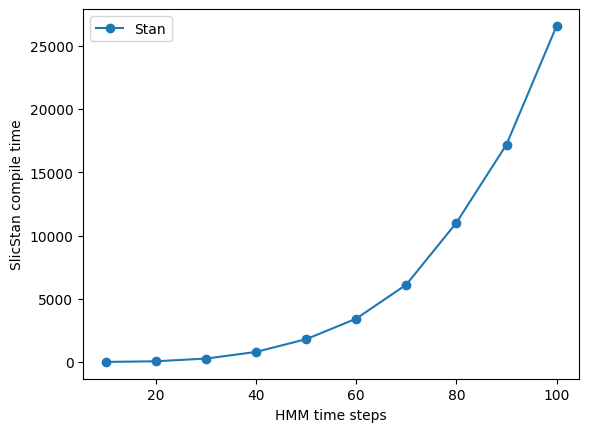

In [7]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("SlicStan compile time")
ax.plot(x, slicstan_time, marker = "o")

ax.legend(["Stan", "Alea"])
fig.savefig("hmm_slicstan.png", bbox_inches="tight")

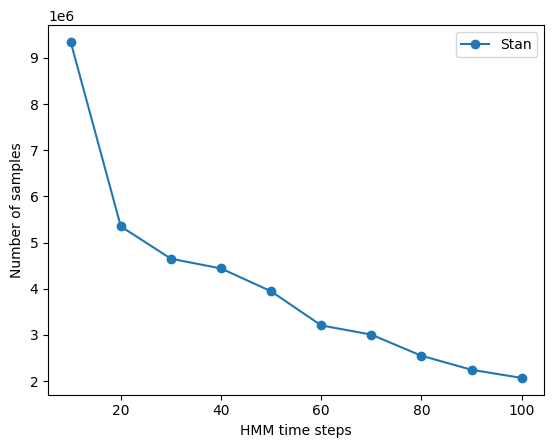

In [8]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("Number of samples")
ax.plot(x, iterations, marker = "o")

ax.legend(["Stan", "Alea"])
fig.savefig("hmm_samples.png", bbox_inches="tight")

4
8
12
16
20
24
28
32
36
40


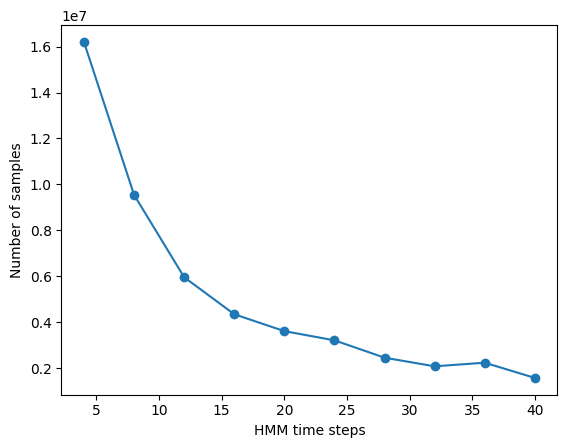

In [18]:
fig, ax = plt.subplots()

ax.set_xlabel("HMM time steps")
ax.set_ylabel("Number of samples")

files = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
iterations = []

abs_error = []
for i in files:
    # stan_res = stan_accuracy("", "theta1", gt["hmm"], f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    # abs_error.append(stan_res)
    print(i)
    stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    iterations.append(stan_iter)
ax.plot(files, iterations, marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("hmm__slicstan_samples.png", bbox_inches="tight")

Gamma

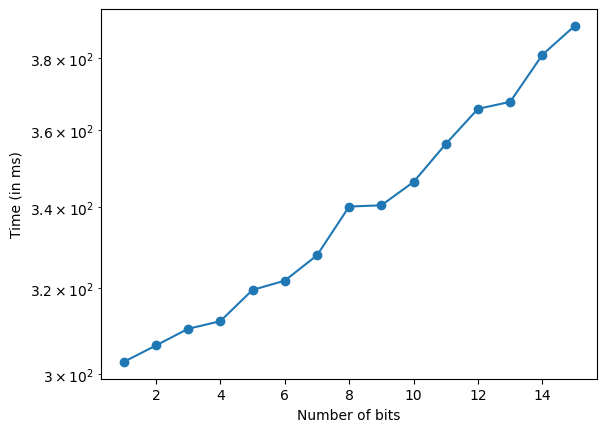

In [4]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in ms)")
ax.set_yscale("log")

files = [i for i in range(1, 16)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/gamma/bit.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("gamma_2_2.png", bbox_inches="tight")

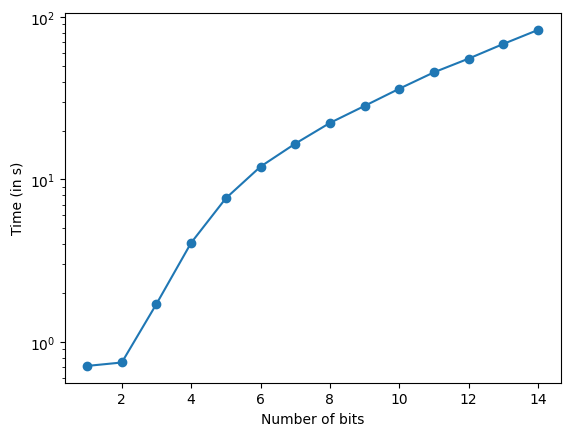

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")

files = [i for i in range(1, 15)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/gamma/bit3.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("gamma_3_2.png", bbox_inches="tight")

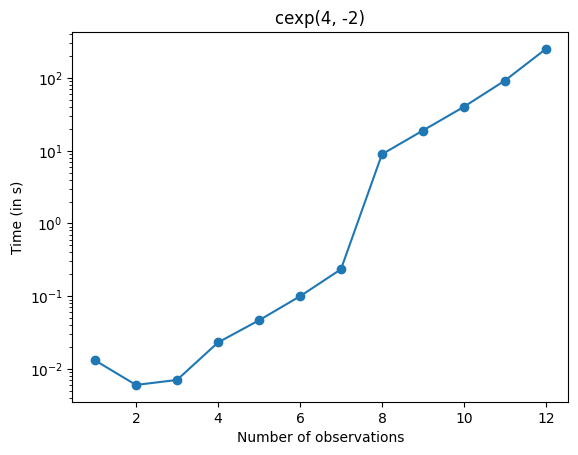

In [10]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of observations")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(4, -2)")

files = [i for i in range(1, 13)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/gamma/and.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("gamma_4_2.png", bbox_inches="tight")

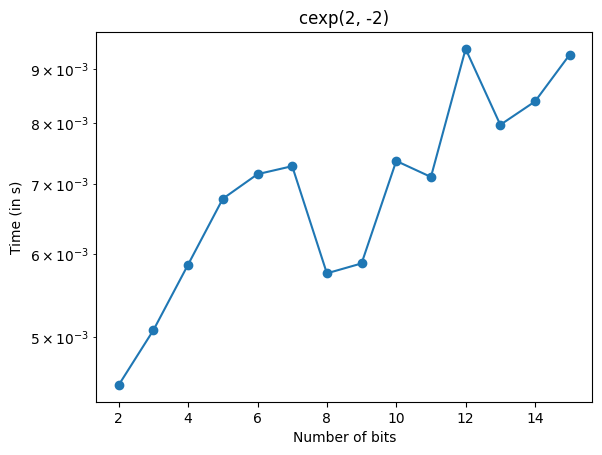

In [17]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(2, -2)")

files = [i for i in range(2, 16)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/gamma/and2.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split(",")[1]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times[1:], marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("gamma_2_2_obs.png", bbox_inches="tight")

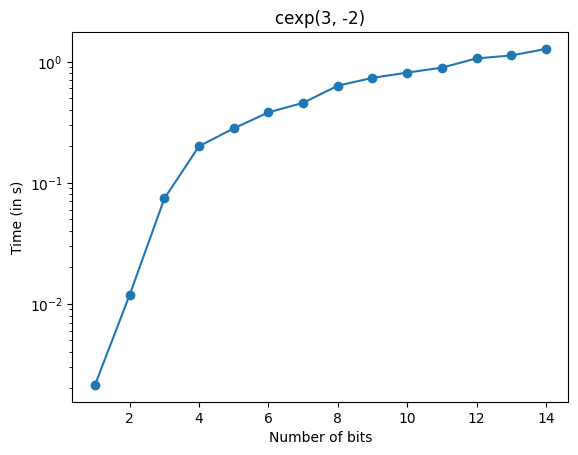

In [18]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(3, -2)")

files = [i for i in range(1, 15)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Alea.jl/benchmarks/gamma/and3.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split(",")[1]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Alea"])
fig.savefig("gamma_3_2_obs.png", bbox_inches="tight")

Figure7

In [6]:
import matplotlib.pyplot as plt

filehandle = open("/space/poorvagarg/.julia/dev/Alea/scratch/clt_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,11):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[3]))
    y.append(float(cur[2]))
    annot.append(int(float(cur[0])))

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time (s)")
ax.set_ylabel("KL divergence")
ax.plot(x, y, marker = "o")
for i in range(11):
     ax.annotate(annot[i], (x[i], y[i]))

filehandle = open("/space/poorvagarg/.julia/dev/Alea/scratch/lpa_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,10):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[2]))
    y.append(float(cur[1]))
    annot.append(int(float(cur[0])))

# fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.plot(x, y, marker = "o")
for i in range(10):
     ax.annotate(annot[i], (x[i], y[i]))
ax.legend(["CLT (#random variables)", "PA (#pieces)"])
fig.savefig("figure7.png", bbox_inches="tight")
# end
# annotate!(x[1], y[1], annot[1])

FileNotFoundError: [Errno 2] No such file or directory: '/space/poorvagarg/.julia/dev/Alea/scratch/clt_results.txt'

Spike and Slab

Kalman Filter

In [13]:
benchmark = "kalman_filter"
gt[benchmark] = 0.0
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
# dice_res = Alea_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Alea/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
# webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 15)
# webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 15)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 40)
aqua_res, webppl_smc_res

6.19320529588475 1.769594280211447
6.7652537489080995 1.7335318968533602
5.938554264326578 2.6830195225537645
6.408096517517377 2.162136863127377
6.855168671709163 1.1426214709703126
5.74291968181029 1.60923585015008
5.854525514956142 1.8826996990245322
5.490660619216021 1.4439637555717681
5.169204331998339 0.713198247138812
5.24569092085237 0.9748421241636175
3.9825648334728676 1.0023757645424933
3.6954986630047264 0.6908211521880956
3.6370540709906254 0.6042715188565944
3.432584597238853 0.7808585104146218
3.6107298475232708 0.4651457156278068
3.5479905469503232 0.333556034302815
40


('not supported', 3.432584597238853)